# Analyse exploratoire des données

In [101]:
import numpy as np
import pandas as pd
import csv
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, f1_score, recall_score, precision_score,confusion_matrix, ConfusionMatrixDisplay)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

In [2]:
import json

## Users_data

In [102]:
df_users = pd.read_csv("users_data.csv",sep=',', header = 0)

In [103]:
#Display the data dimentionality
display(df_users.shape)
#Display data types
df_users.dtypes

(2000, 14)

id                     int64
current_age            int64
retirement_age         int64
birth_year             int64
birth_month            int64
gender                object
address               object
latitude             float64
longitude            float64
per_capita_income     object
yearly_income         object
total_debt            object
credit_score           int64
num_credit_cards       int64
dtype: object

In [104]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [105]:
display(df_users.isnull().sum())   #Check for missing values -- parfait

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

In [106]:
df_users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [ ]:
df_users.nunique() # checker si on peut convertir certaines colonnes en catégorielles


id                   2000
current_age            80
retirement_age         29
birth_year             80
birth_month            12
gender                  2
address              1999
latitude              989
longitude            1224
per_capita_income    1754
yearly_income        1948
total_debt           1880
credit_score          321
num_credit_cards        9
dtype: int64

In [ ]:
# Supprimer les symboles ($, ,) --> passer les colonnes de prix en float
for col in ["per_capita_income", "yearly_income", "total_debt"]:
    df_users[col] = df_users[col].replace('[$]', '', regex=True).astype(float)

df_users['gender_encoded'] = df_users['gender'].map({'Male':0, 'Female':1})
df_users['address']= df_users['address'].astype('string')
df_users = df_users.drop(columns=['gender'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   address            2000 non-null   string 
 6   latitude           2000 non-null   float64
 7   longitude          2000 non-null   float64
 8   per_capita_income  2000 non-null   float64
 9   yearly_income      2000 non-null   float64
 10  total_debt         2000 non-null   float64
 11  credit_score       2000 non-null   int64  
 12  num_credit_cards   2000 non-null   int64  
 13  gender_encoded     2000 non-null   int64  
dtypes: float64(5), int64(8), string(1)
memory usage: 218.9 KB


In [109]:
df_users.dtypes

id                            int64
current_age                   int64
retirement_age                int64
birth_year                    int64
birth_month                   int64
address              string[python]
latitude                    float64
longitude                   float64
per_capita_income           float64
yearly_income               float64
total_debt                  float64
credit_score                  int64
num_credit_cards              int64
gender_encoded                int64
dtype: object

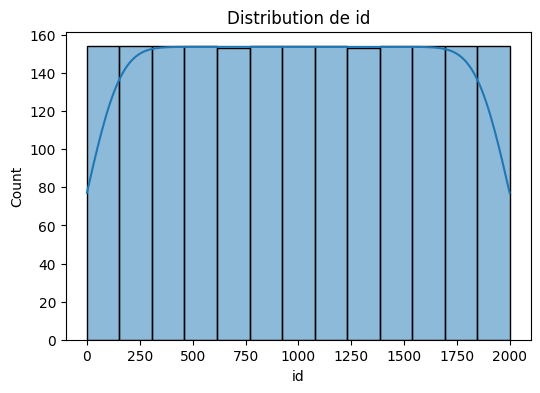

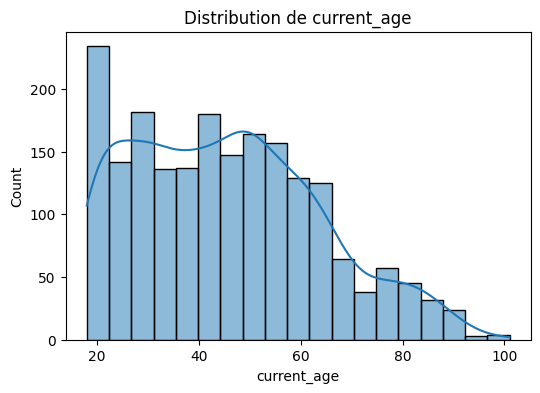

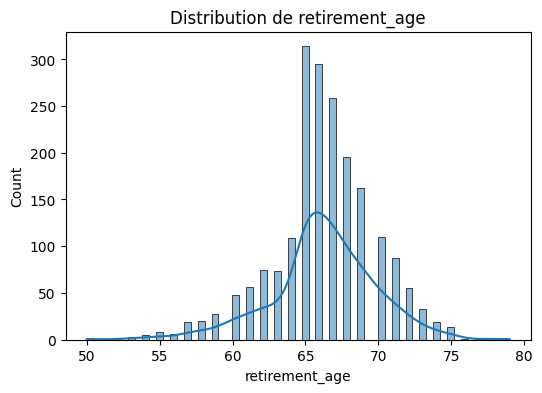

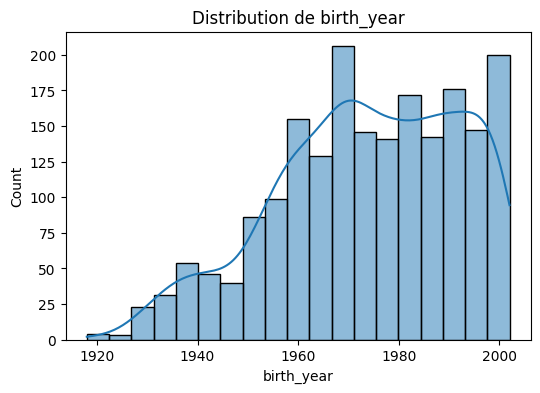

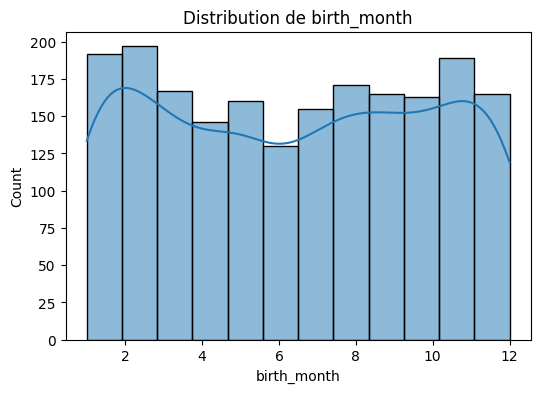

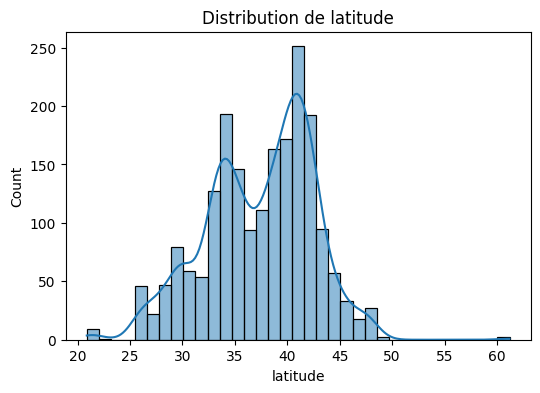

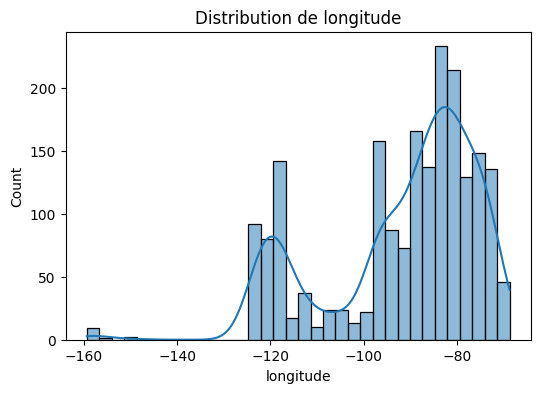

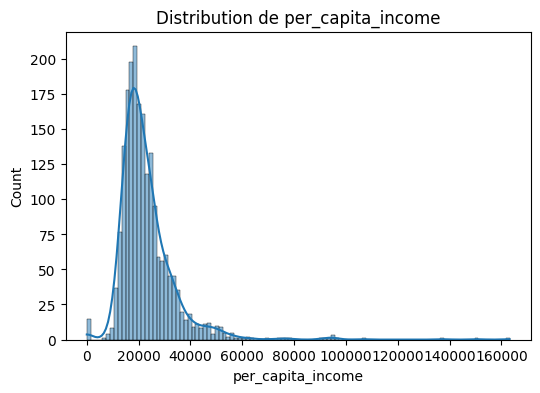

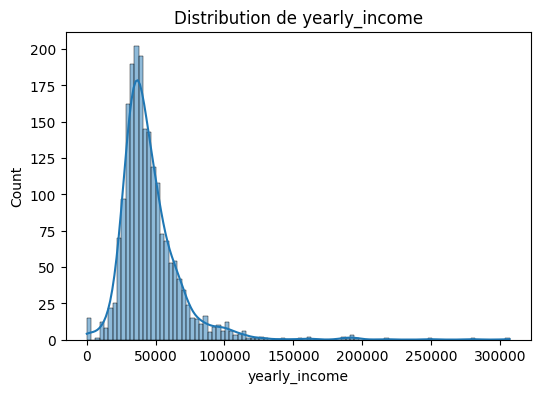

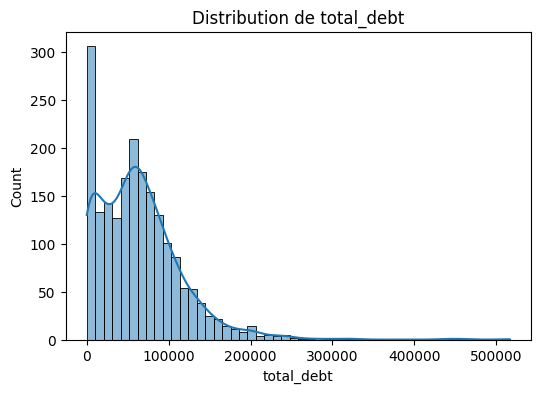

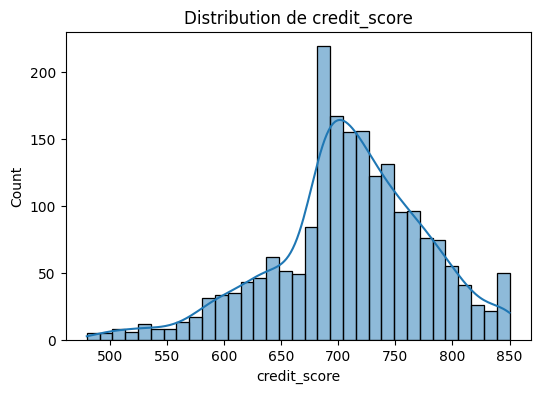

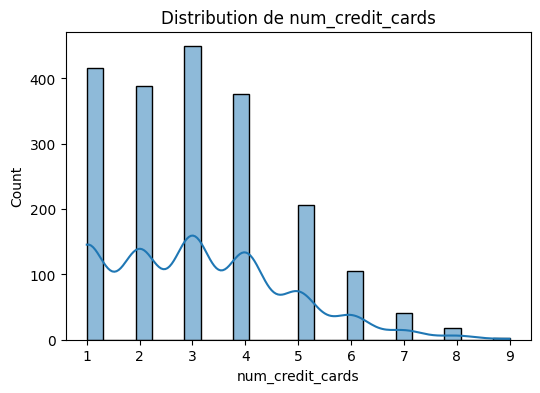

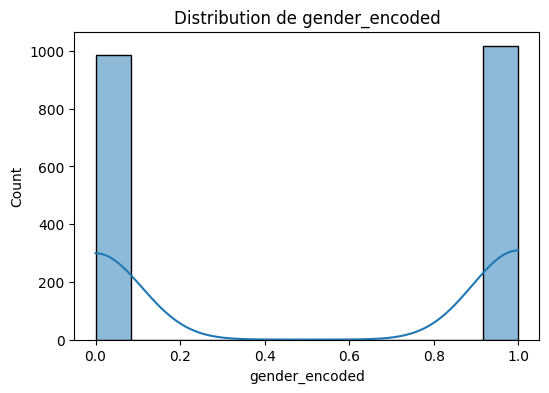

In [110]:
num_cols = df_users.select_dtypes(include=np.number).columns
cat_cols = df_users.select_dtypes(include='object').columns

# Variables numériques
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_users[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()

# Variables catégorielles
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_users[col])
    plt.title(f'Distribution de {col}')
    plt.show()


L'idée ici est de voir à quoi ressemblent nos data. 
Ce qu'on peut retenir est que globalement: 
- la répartition des revenus suit une gaussienne
- répartition Homme / Femme dans le dataset equitable --> bonne représentation de la réalité


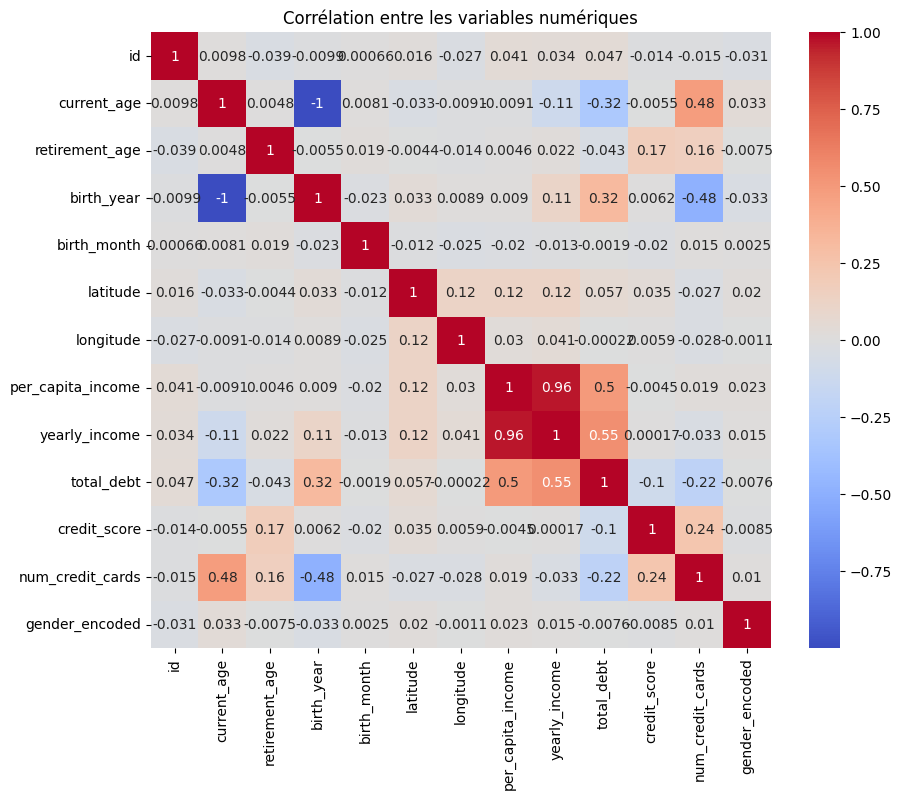

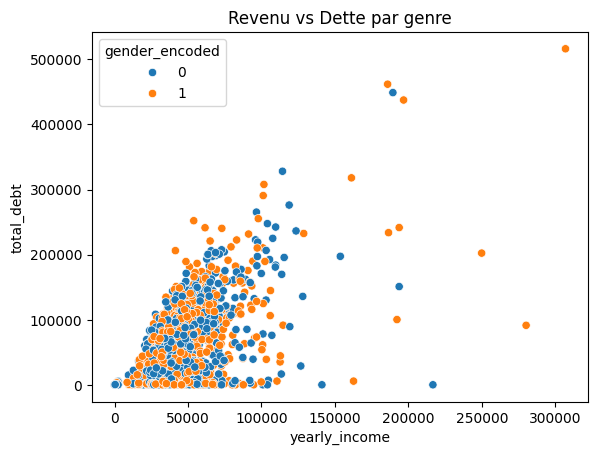

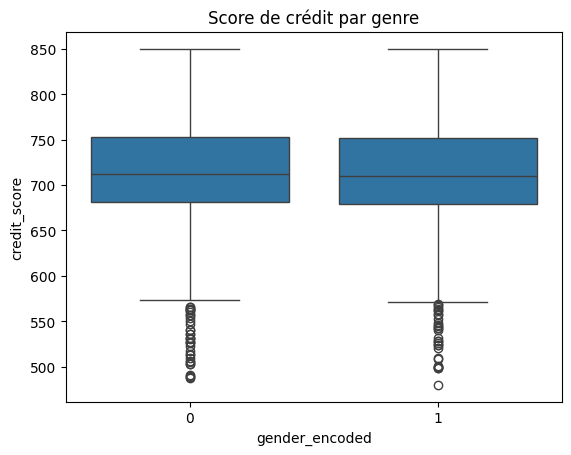

In [111]:
plt.figure(figsize=(10,8))
sns.heatmap(df_users.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables numériques")
plt.show()

# Exemples de relations
sns.scatterplot(x='yearly_income', y='total_debt', hue='gender_encoded', data=df_users)
plt.title("Revenu vs Dette par genre")
plt.show()

sns.boxplot(x='gender_encoded', y='credit_score', data=df_users)
plt.title("Score de crédit par genre")
plt.show()


ici l'idée est de voir les tendances

Matrice de corrélation:
- -1 entre age et year of bith : logique
- 0.5 de correlation entre revenu annuel et total dept (peut etre contre intuitif mais logique)
- on peut décider de supprimer la colonne year of bith etant donné qu'elle n'apporte pas d'information supplémentaire

Graphe revenu VS Dette / genre:
- RAS

Graphe score credit / genre
- RAS

## Cards_data

In [112]:
df_cards = pd.read_csv("cards_data.csv",sep=',', header = 0)

In [113]:
#Display the data dimentionality
display(df_cards.shape)
#Display data types
df_cards.dtypes

(6146, 13)

id                        int64
client_id                 int64
card_brand               object
card_type                object
card_number               int64
expires                  object
cvv                       int64
has_chip                 object
num_cards_issued          int64
credit_limit             object
acct_open_date           object
year_pin_last_changed     int64
card_on_dark_web         object
dtype: object

In [114]:
df_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [115]:
display(df_cards.isnull().sum())   #Check for missing values -- parfait

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

In [116]:
df_cards.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [117]:
df_cards.nunique()


id                       6146
client_id                2000
card_brand                  4
card_type                   3
card_number              6146
expires                   259
cvv                       998
has_chip                    2
num_cards_issued            3
credit_limit             3654
acct_open_date            303
year_pin_last_changed      19
card_on_dark_web            1
dtype: int64

In [119]:
for col in ["card_brand", "card_type", "has_chip", "num_cards_issued"]:
    df_cards[col] = df_cards[col].astype('category')

df_cards['has_chip'] = df_cards['has_chip'].map({'NO':0, 'YES':1})

for col in ["expires", 'acct_open_date']: #MM/YYYY
    df_cards[col] = pd.to_datetime(df_cards[col])



df_cards.dtypes


id                                int64
client_id                         int64
card_brand                     category
card_type                      category
card_number                       int64
expires                  datetime64[ns]
cvv                               int64
has_chip                       category
num_cards_issued               category
credit_limit                     object
acct_open_date           datetime64[ns]
year_pin_last_changed             int64
card_on_dark_web                 object
dtype: object

In [120]:
df_cards['credit_limit'] = df_cards['credit_limit'].replace('[$]', '', regex=True).astype(float)
df_cards = df_cards.drop(columns=['card_on_dark_web'])

In [121]:
df_cards.dtypes

id                                int64
client_id                         int64
card_brand                     category
card_type                      category
card_number                       int64
expires                  datetime64[ns]
cvv                               int64
has_chip                       category
num_cards_issued               category
credit_limit                    float64
acct_open_date           datetime64[ns]
year_pin_last_changed             int64
dtype: object

In [122]:
df_users.to_csv("data/clean/users_data_cleaned.csv", index=False)
df_cards.to_csv("data/clean/cards_data_cleaned.csv", index=False)

In [5]:
import pandas as pd

###  Traitement des Labels and MCC 

In [8]:
with open("data/raw/mcc_codes.json", "r") as f:
    mcc_codes = json.load(f)

mcc = pd.DataFrame(
    list(mcc_codes.items()),
    columns=["mcc", "mcc_description"]
)

labels = pd.read_json("data/raw/train_fraud_labels.json")


In [10]:
labels.head()

,target
19765990,No
22160255,No
17566794,No
17318690,No
20994060,No


In [11]:
mcc.head()


,mcc,mcc_description
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees


### pie chart pour voir la répartition des labels

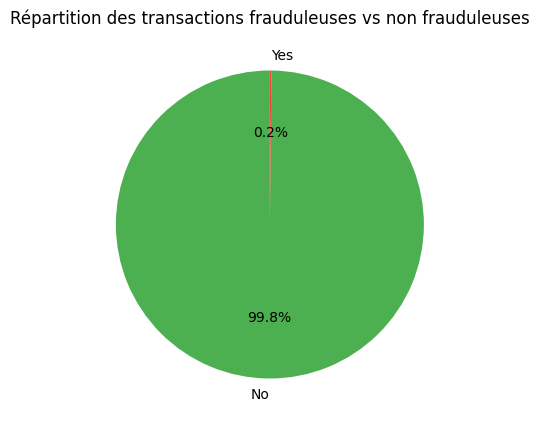

In [17]:
# Comptage des valeurs
label_counts = labels["target"].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", startangle=90, colors=["#4CAF50", "#F44336"])
plt.title("Répartition des transactions frauduleuses vs non frauduleuses")
plt.show()

On remarque que les fraudes ne représentent que 0.2% des transactions.

### Barplot pour les MCC deszcription

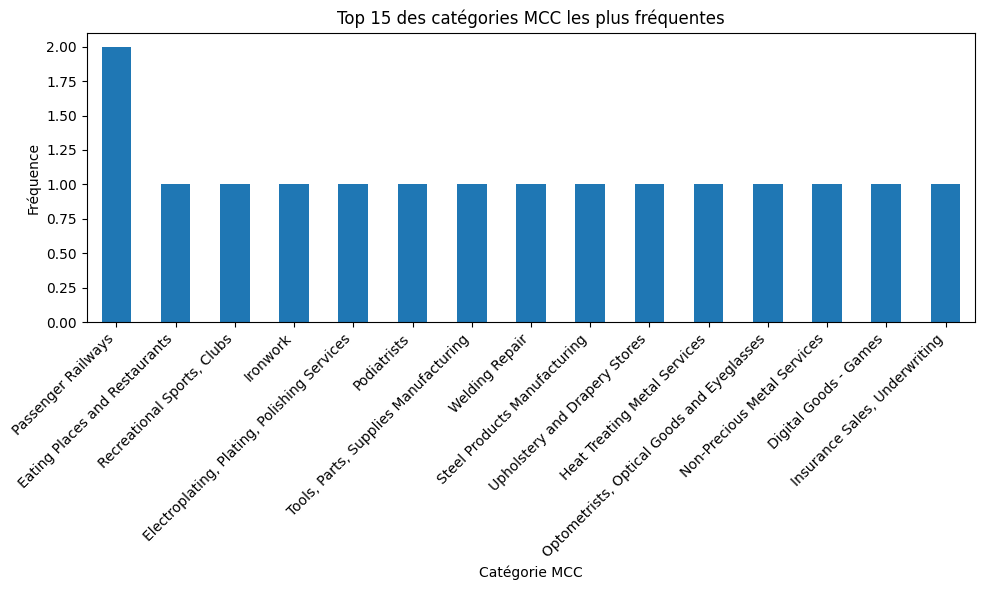

In [18]:
plt.figure(figsize=(10, 6))
mcc["mcc_description"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 des catégories MCC les plus fréquentes")
plt.xlabel("Catégorie MCC")
plt.ylabel("Fréquence")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Enrichissement des colonnes des jsons

In [19]:
labels = labels.reset_index()
labels = labels.rename(columns={"index": "transaction_id"})
labels["target"] = labels["target"].map({"Yes": 1, "No": 0})
labels.head()

,transaction_id,target
0,19765990,0
1,22160255,0
2,17566794,0
3,17318690,0
4,20994060,0


In [22]:
labels.to_csv("data/clean/labels_clean.csv", index=False)
mcc.to_csv("data/clean/mcc_data_cleaned.csv", index=False)